# Recocido Simulado

In [1]:
from simulated_annealing import SAnnealing
import numpy as np
import matplotlib.pyplot as plt

# Problema de Optimización

En este ejemplo, se desea optimizar la función objetivo $f(x) = x^3 - 60x^2 + 900x + 100$. El planteamiento en este problema es obtener el valor de $x$ que maximice el resultado obtendio en la función objetivo $f(x)$.

In [2]:
def cubic_function(x):
    return x**3 - 60*x**2 + 900*x + 100

Para simplificar el problema la función objetivo elegida, solo contiene un óptimo global, el cual se obtiene cuando $x=10$.

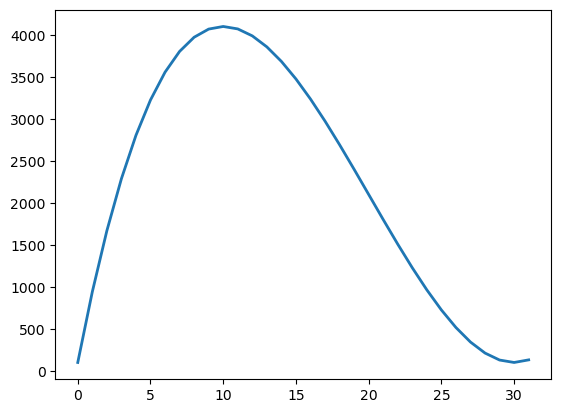

In [3]:
x = np.arange(32)
y = np.array(list(map(cubic_function, x)))

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

# ax.set(xlim=(0, 32), xticks=np.arange(0, 32),
#        ylim=(0, 5000), yticks=np.arange(0, 5000))

plt.show()

# Implementación de la función objetivo 

In [4]:
def cubic_function(x):
    x = int(''.join(str(c) for c in x), 2)
    return (x, x**3 - 60*x**2 + 900*x + 100)

Para la codificación de las soluciones, se utiliza una codificación binaria. Dado que el problema se limita a explorar solluciones como validas en un rango de número enteros entre $[0, 32]$.

La representación require del uso de una solución codificada en una cadena de tamaño $n=5$ donde $x = \{x_1, x_2, x_3, x_4, x_5\}, \forall x_i \in \{1, 0\}$.

# Experimento no. 1

En este primer ejemplo se implementa el Recocido Simulado con una temperatura inicial $T_0=500$

In [5]:
sa = SAnnealing(domain=((0, 32),), step=1, final_temperature=0.1, temperature=500, alpha=0.95, equilibrium=15, time=0)
sa.fit(cubic_function)

2505 Epoch | Equilibrium 15 | Temperature 0.10 | Actual solution 10.00 | Cost function: 4100.00 | Aceptance : 0.0000

De acuerdo a los resultado obtenidos, la solución final $x = 01010$ convertida a su presentación al problema real es $x = 10$ obtienen un valor en la función objetivo $f(10) = 4100$. Teóricamente, se conoce que es el valor óptimo global ideal a alcanzar.

En la siguente gráfica se muestra, el número de iteraciones _vs_ el valor en la función objetivo $f(x). Se puede apreciar que en las primera iteraciones la degradación de las solución es aceptada por el SA, sin embargo, en iteraciones al rededor de 400, las soluciones que degradan el resultado, tienen menos probabilidades de ser aceptadas. Al final, despúes de alrededor de 1250 iteraciones, la metahuerística no perimte soluciones que degraden el resultado obtenido. 

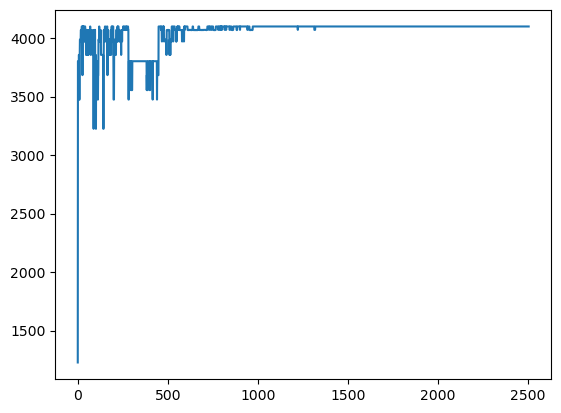

In [6]:
plt.plot(range(len(sa.cost_)), [x[1] for x in sa.cost_ ])
plt.show()

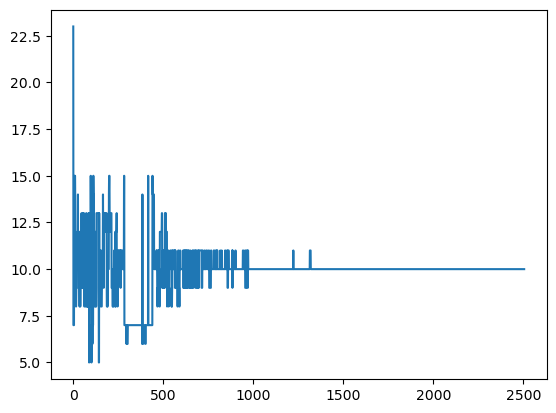

In [7]:
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()

# Experimento no. 1

En este primer ejemplo se implementa el Recocido Simulado con una temperatura inicial $T_0=200$

In [8]:
sa = SAnnealing(domain=((0, 32),), step=1, final_temperature=0.1, temperature=200, alpha=0.95, equilibrium=10, time=0)
sa.fit(cubic_function)

1490 Epoch | Equilibrium 10 | Temperature 0.10 | Actual solution 16.00 | Cost function: 3236.00 | Aceptance : 0.0000

Después de ejecutar la metaheurística con una temperatura menor a la del experimento 1. Se puede notar que el resultado final de la metaheurísticas es menor, es decir, no alcanzó a converger en el óptimo global. Lo cual afirma que temperaturas bajas no permiten alcanzar el estado de de cristalización. Por lo que, se puede concluir que en este caso, se termina en un estado metaestable. 

En la siguente gráfica se puede analizar el comportamiento de la aceptación de soluciones que degrada el resultado.

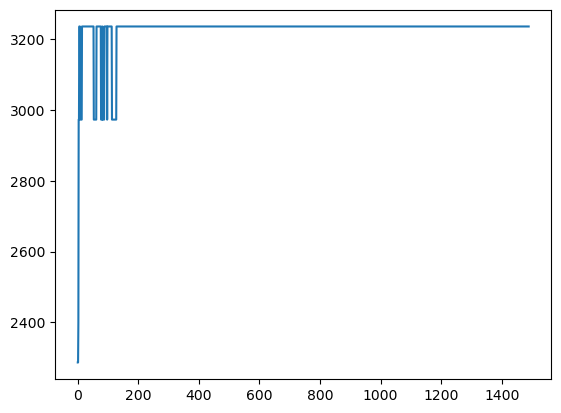

In [9]:
plt.plot(range(len(sa.cost_)), [x[1] for x in sa.cost_ ])
plt.show()

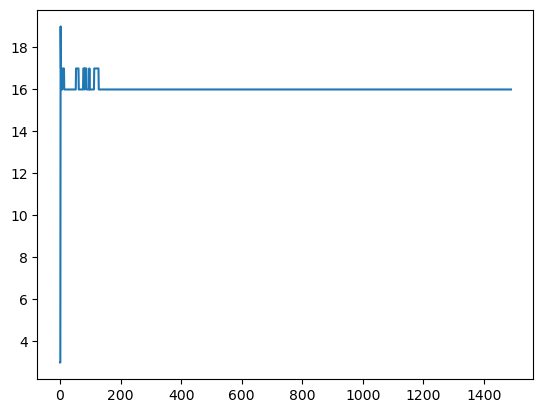

In [10]:
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()